In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Zad1

In [2]:
def autocov_theo(phi, sigma2, nlags):
    gamma_0 = sigma2 / (1- phi**2)
    return [gamma_0 * phi**h for h in range(nlags + 1)]
    
def autocov_est(h,x):
    n = len(x)
    x_sr = np.mean(x)
    suma = 0
    for i in range(n-h):
        suma += (x[i] - x_sr)*(x[i+h] - x_sr) 
    return 1/n * suma 

def autocorr_est(h,x):
    return autocov_est(h,x)/autocov_est(0,x)


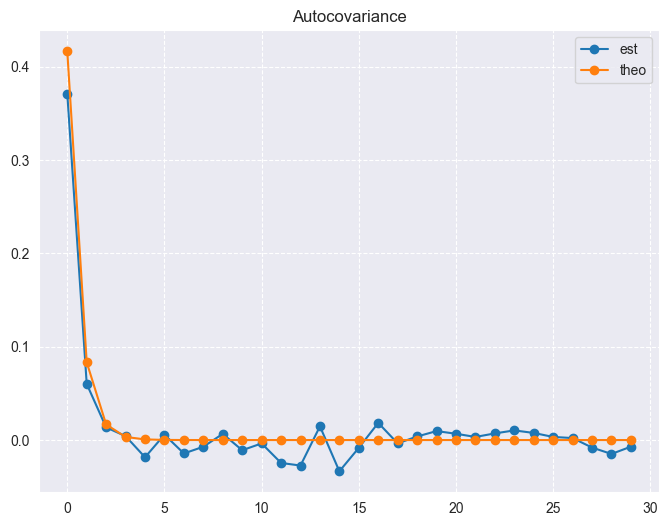

In [3]:
sigma = 0.4
n = 1000
fi = 0.2
x = np.zeros(1000)
z = np.random.normal(0,np.sqrt(sigma),n)

for i in range(1,1000):
    x[i] = z[i-1] + fi*x[i-1]
    
h = np.arange(0,30,1)

a = autocov_theo(fi,sigma,29)
ae = []
for i in h:
    ae.append(autocov_est(i,x))
    
plt.figure(figsize=(8,6))
plt.title(f'Autocovariance')
plt.plot(h,ae,marker='o',label = 'est')
plt.plot(h,a,marker='o',label = 'theo')
plt.grid(linestyle ='--')
plt.legend()
plt.show()

# Zad2

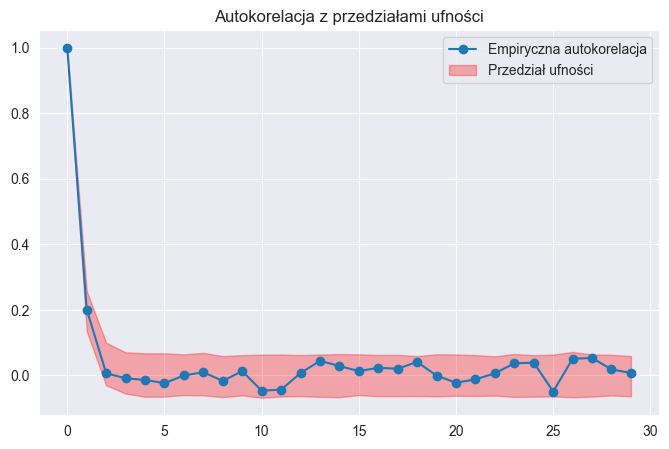

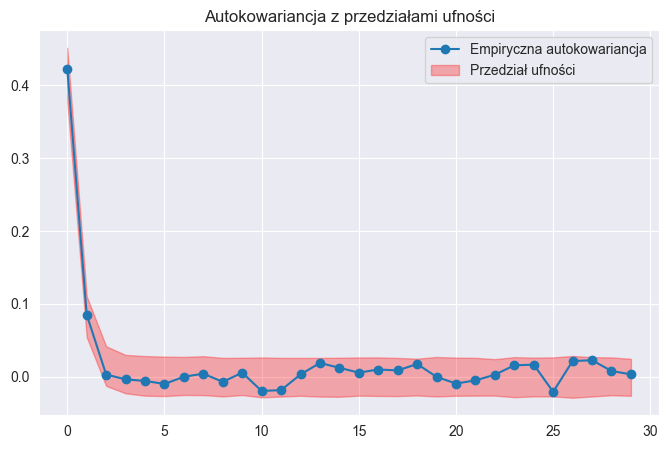

In [4]:
sigma = 0.4
n = 1000
fi = 0.2
n_simulations = 1000
h = np.arange(0,30,1)
conf_level = 0.95

acf_values = []
acvf_values = []
for _ in range(n_simulations):
    x = np.zeros(1000)
    z = np.random.normal(0,np.sqrt(sigma),n)
    for i in range(1,1000):
        x[i] = z[i-1] + fi*x[i-1]
    acf_e = []
    acvf_e = []
    for i in h:
        acf_e.append(autocorr_est(i,x))
        acvf_e.append(autocov_est(i,x))
    acf_values.append(acf_e)
    acvf_values.append(acvf_e)

acf_values = np.array(acf_values)
acvf_values = np.array(acvf_values)


lacf = np.quantile(acf_values, (1 - conf_level) / 2, axis=0)
uacf = np.quantile(acf_values, (1 + conf_level) / 2, axis=0)

# Wizualizacja przedziałów ufności
plt.figure(figsize=(8, 5))
plt.plot(h, acf_e, label="Empiryczna autokorelacja",marker='o')
plt.fill_between(h, lacf[:len(h)], uacf[:len(h)], color='red', alpha=0.3, label="Przedział ufności")
plt.title("Autokorelacja z przedziałami ufności")
plt.legend()
plt.show()


lacvf = np.quantile(acvf_values, (1 - conf_level) / 2, axis=0)
uacvf = np.quantile(acvf_values, (1 + conf_level) / 2, axis=0)

# Wizualizacja przedziałów ufności
plt.figure(figsize=(8, 5))
plt.plot(h, acvf_e, label="Empiryczna autokowariancja",marker='o')
plt.fill_between(h, lacvf[:len(h)], uacvf[:len(h)], color='red', alpha=0.3, label="Przedział ufności")
plt.title("Autokowariancja z przedziałami ufności")
plt.legend()
plt.show()